# Spectral graph partitioning

## Spectral clustering

There are several different approaches, here the steps of 3 are discussed and tested: unnormalized spectral clustering, normalized spectral clustering based on Lrw and normalized spectral clustering based on Lsym.

The general steps are:
- given set of n points
- compute pariwise similarities using symmetric non-negative symmetry function -> similarity matrix
- construct a similarity graph -> derive weighted adjacency matrix
- calculate the unnomalized Laplacian / unnormalized Laplacian / normalized Laplacian Lsym
- compute first k eigenvectors of Laplacian / first k generalized eigenvectors / first k eigenvectors of Lsym
- store eigenvectors as columns of matrix U (for all 3 approaches)
- derive matrix T from U by normalizing row to norm 1 (only for normalized approach using Lsym)
- for i = 1,...,n yi is the vextor corresponding to the ith row of U / U / T
- cluster the points (yi)i = 1,...,n with k-means algorithm into clusters C1,...,Ck
- output are the clusters A1,...,Ak with Ai = {j | yj element Ci}

In [1]:
import numpy as np
# example set of points, described by x and y coordinates n = 8
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([2, 3, 4, 1, 5, 2, 6, 4])

points = np.array((x,y)).T
print(points)

[[1 2]
 [2 3]
 [3 4]
 [4 1]
 [5 5]
 [6 2]
 [7 6]
 [8 4]]


### Derive the similarity matrix
similarities can be derived in several different ways. 

In [2]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
#from sklearn.metrics.pairwise import euclidean_distances
#euclidean_distances(points, points)

# distance functions: euclidean
#distance.pdist(points, metric='euclidean').round(2)

# distance matrix based on euclidean distance
eucl_dist = distance_matrix(points, points).round(2)

# similarity matrix: for all values below threshold: 1, for values above threshold 0
threshold = 3.50
S = np.empty([8, 8])

for i,row in enumerate(eucl_dist):
    for j,item in enumerate(row):
        if item < threshold:
            S[i,j] = 1
        else:
            S[i,j] = 0
S

array([[1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.]])

### Construct similarity graph
Here a epsilon similarity graph is constructed.

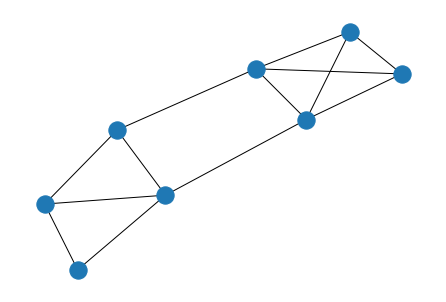

In [3]:
import networkx as nx
# crate node names for each point
nodes = np.array(range(len(x)))
nodes

# construct graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(nodes)

# add edges
for i, row in enumerate(S):
    for j, col in enumerate(row):
        if col > 0:
            G.add_edge(nodes[i], nodes[j])

# remove selfloops
G.remove_edges_from(nx.selfloop_edges(G))

# draw the graph
nx.draw(G)

### Derive laplacian matrices

unnormalized Laplacian L = D - A (degree matrix - adjacency matrix)

In [30]:
# derive degree matrix
D = np.empty([8, 8])
for i, row in enumerate(nodes):
    for j, col in enumerate(nodes):
        if i == j:
            D[i,j] = G.degree[row]
        else:
            D[i,j] = 0
print('degree matrix D:', '\n', D)


# derive adcacency matrix
A = nx.adjacency_matrix(G)
#print(A)
A = A.todense()
print('\n', 'adjacency matrix A:', '\n', A)

# unnormalized laplacian
L_un = nx.laplacian_matrix(G).todense()
print('\n', 'built-in unnormalized Laplacian L', '\n', L_un)

L_un_self = D - A
#print(L_un_self)

# normalized laplacian (Lsym)
L_sym = nx.normalized_laplacian_matrix(G).todense().round(2)
print('\n', 'normalized Laplacian Lsym', '\n', L_sym)

# normalized laplacian (Lrw) is not built in and requires a some linear algebra to get there, so its a skip for now

degree matrix D: 
 [[3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3.]]

 adjacency matrix A: 
 [[0 1 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [1 1 0 1 1 0 0 0]
 [1 1 1 0 0 1 0 0]
 [0 0 1 0 0 1 1 1]
 [0 0 0 1 1 0 0 1]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 1 1 1 0]]

 built-in unnormalized Laplacian L 
 [[ 3 -1 -1 -1  0  0  0  0]
 [-1  3 -1 -1  0  0  0  0]
 [-1 -1  4 -1 -1  0  0  0]
 [-1 -1 -1  4  0 -1  0  0]
 [ 0  0 -1  0  4 -1 -1 -1]
 [ 0  0  0 -1 -1  3  0 -1]
 [ 0  0  0  0 -1  0  2 -1]
 [ 0  0  0  0 -1 -1 -1  3]]

 normalized Laplacian Lsym 
 [[ 1.   -0.33 -0.29 -0.29  0.    0.    0.    0.  ]
 [-0.33  1.   -0.29 -0.29  0.    0.    0.    0.  ]
 [-0.29 -0.29  1.   -0.25 -0.25  0.    0.    0.  ]
 [-0.29 -0.29 -0.25  1.    0.   -0.29  0.    0.  ]
 [ 0.    0.   -0.25  0.    1.   -0.29 -0.35 -0.29]
 [ 0.    0.    0.   -0.29 -0.29  1.    0.   -0.

C:\Users\chiar\AppData\Local\Temp/ipykernel_9056/3994074545.py:13: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


# Get the first k Eigenvectors

Here k refers to the number of clusters. The first k eigenvectors of the laplacian matrix are derive and stored as column vectors in the matrix U. For normalized spectral clustering using Lsym a furhter normalization step is required which leads to matrix T derived from U.

In [50]:
# number of clusters
k = 3

# calculate eigenvalues and eigenvectors from unnormalized laplacian
eig_vals, eig_vecs = np.linalg.eig(L_un)
eig_vals = eig_vals[0:3]
eig_vecs = eig_vecs[0:3]

# store the eigenvectors in matrix U
U = eig_vecs.T

# calculate eigenvalues and eigenvectors from normalized laplacian Lsym
eig_vals, eig_vecs = np.linalg.eig(L_sym)
eig_vals = eig_vals[0:3]
eig_vecs = eig_vecs[0:3]

# form U
U_norm = eig_vecs.T

# derive T from U
T = np.empty([3, 8])
for i,row in enumerate(T):
    for j,col in enumerate(T):
        T[i,j] = U[i,j]/np.sqrt(U[i].sum())

T = T.T

[[ 3.40748697e-01  3.40748697e-01  3.93675948e-01]
 [ 3.80303286e-01  3.80303286e-01  2.69327987e-01]
 [ 1.55099665e-01  1.55099665e-01  2.80044958e-01]
 [-2.52795682e-02 -2.52795682e-02 -2.75876459e-01]
 [-2.59824899e-01 -2.59824899e-01  5.56303429e-01]
 [ 2.51484982e-01  2.51484982e-01 -5.55322213e-01]
 [-7.07106781e-01  7.07106781e-01  2.89709683e-15]
 [ 2.89501466e-01  2.89501466e-01 -9.61350168e-03]]


1.060660171779821